In [1]:
! pip install ipykernel

In [4]:
! pip install matplotlib

  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 19.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 9.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.3 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------- ---------------------------- 

In [5]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Data Ingestion step
df = pd.read_csv(r'data/gemstone.csv')
data = df.rename(columns={'Unnamed: 0' : "id"})
data

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
# see missing values
print("No missing values are present in the dataset.")
data.isnull().sum()

No missing values are present in the dataset.


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [35]:
# check info of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [36]:
# Lets drop the id columns
data.drop(labels=['id'], axis=1).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
# check for duplicated records
data.duplicated().sum()

np.int64(0)

In [38]:
# segregate numerical and categorical columns
numerical_columns = data.columns[data.dtypes !='object']
categorical_columns = data.columns[data.dtypes == 'object']
print("Numerical columns", numerical_columns)
print("Categorical columns", categorical_columns)

Numerical columns Index(['id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [39]:
data[categorical_columns].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [40]:
data[numerical_columns].describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
data['cut'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,cut,count
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


In [42]:
data['color'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,color,count
0,G,11292
1,E,9797
2,F,9542
3,H,8304
4,D,6775
5,I,5422
6,J,2808


In [43]:
data['clarity'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,clarity,count
0,SI1,13065
1,VS2,12258
2,SI2,9194
3,VS1,8171
4,VVS2,5066
5,VVS1,3655
6,IF,1790
7,I1,741


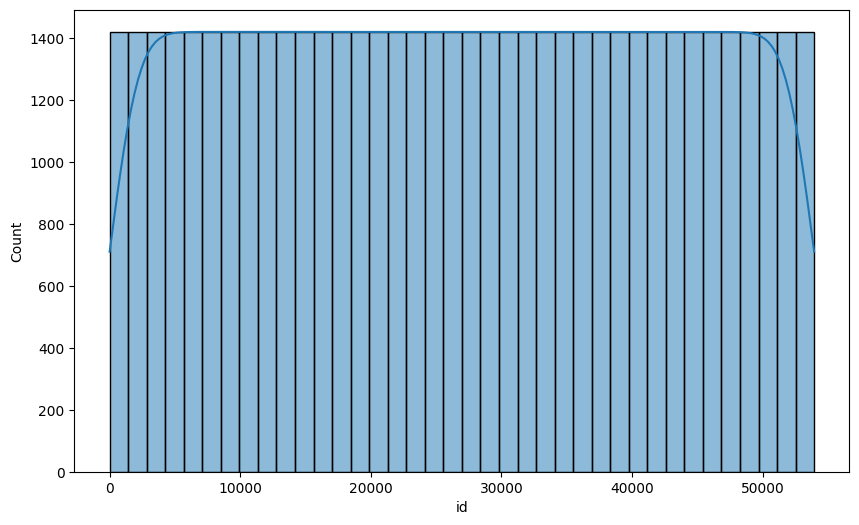

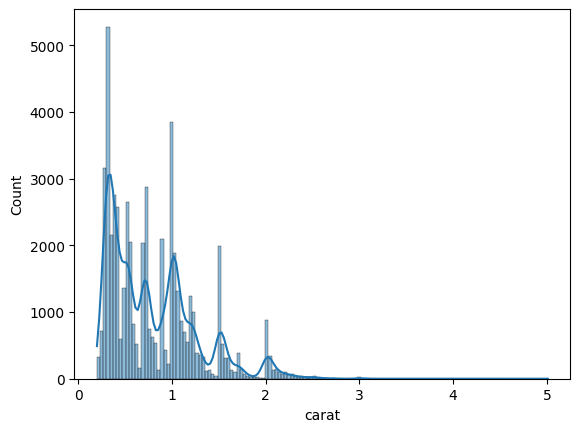

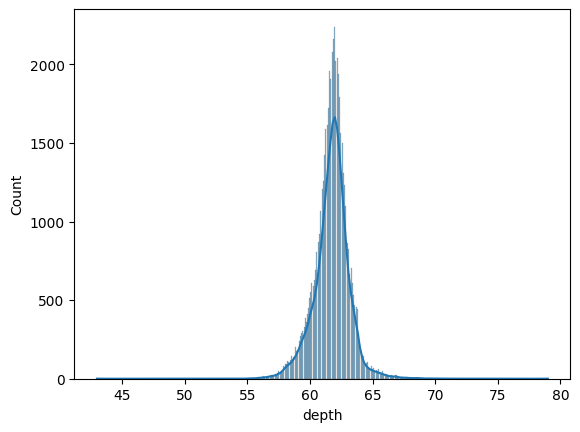

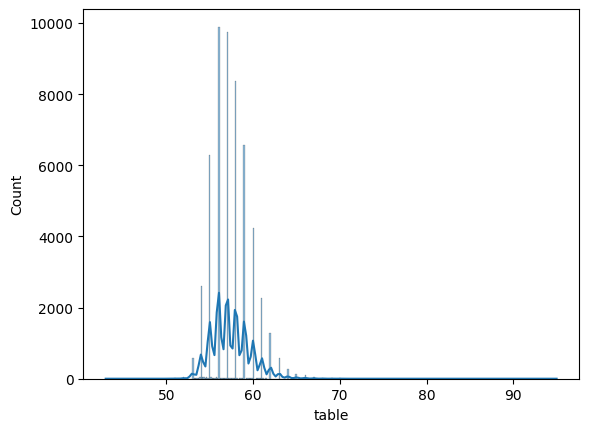

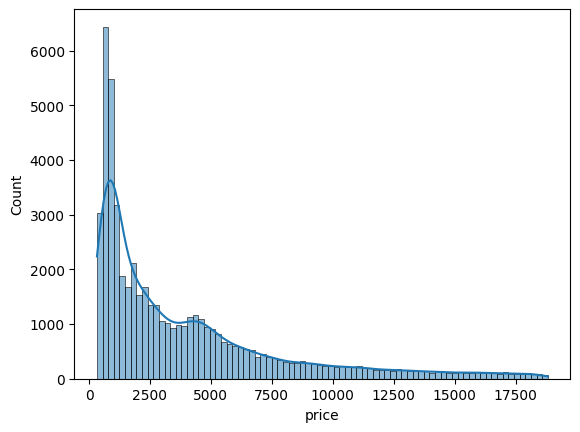

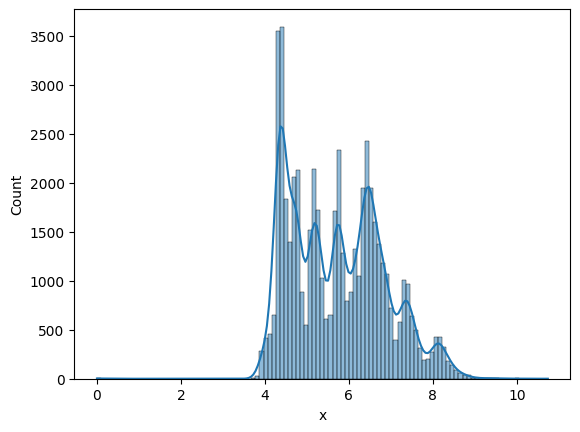

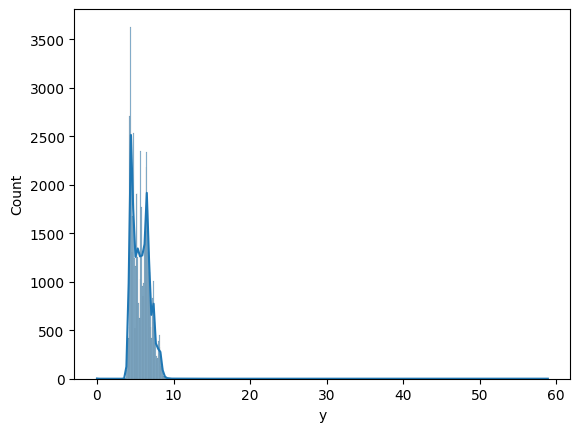

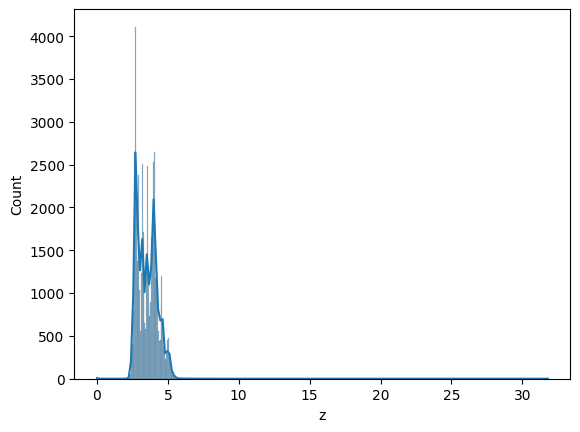

In [44]:
plt.figure(figsize=(10, 6))
x = 1
for i in numerical_columns:
     sns.histplot(data = data, x = i, kde=True)
     print("\n")
     plt.show()

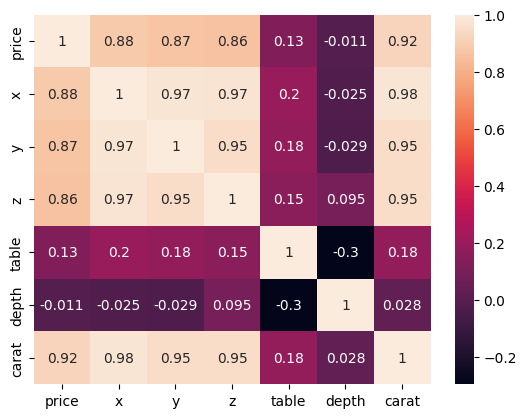

In [48]:
# correlation
df_1 = data.filter(items=['price', 'x','y', 'z', 'table', 'depth', 'carat'])
sns.heatmap(df_1.corr(), annot=True)
plt.show()